<a href="https://colab.research.google.com/github/Mosaraf15/Joining-Data-with-pandas/blob/main/02_Merging_Tables_With_Different_Join_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

movies = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/movies.p')
financials = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/financials.p')


#**Counting missing rows with left join**
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The movies and financials tables have been loaded for you.

**Instructions**

1. Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
2. Count the number of rows in movies_financials with a null value in the budget column.

In [ ]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [ ]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [ ]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


In [ ]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


#**Enriching a dataset**
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.

In [ ]:
taglines = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/taglines.p')
taglines.head()                                       # Extra

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [ ]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [ ]:
toy_story = movies[movies['title'].str.contains('Toy Story')]    # Extra , .str.contains-----> means peak 'Toy Story'

#toy_story = movies[movies['title']=='Toy Story']------>  only peak 'Toy Story'

toy_story.head()

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


**Instructions**

1. Merge **toy_story** and taglines on the **id** column with a **left join**, and save the result as toystory_tag.

In [ ]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id',how='left')

# Print the rows and shape of toystory_tag
display(toystory_tag)
#print(toystory_tag)
print(toystory_tag.shape)

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


(3, 5)



2. With **toy_story** as the **left** table, merge to it **taglines** on the **id** column with an **inner** join, and save as toystory_tag.

In [ ]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

# Print the rows and shape of toystory_tag
display(toystory_tag)
#print(toystory_tag)
print(toystory_tag.shape)

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


(2, 5)


## **How many rows with a left join?**
### **Select the true statement about left joins.**

Try running the following code statements in the IPython shell.

1. **left_table.merge(one_to_one, on='id', how='left').shape**
2. **left_table.merge(one_to_many, on='id', how='left').shape**

Note that the left_table starts out with 4 rows.

1. **The output of a one-to-many merge with a left join will have greater than or equal rows than the left table.**

#**Right join to find unique movies**
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [ ]:
movie_to_genres = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/movie_to_genres.p')
movie_to_genres.head()


,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [ ]:
#action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']   ----->

action_movies = movie_to_genres[movie_to_genres['genre'].str.contains('Action')]

action_movies.head()

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


In [ ]:
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']
scifi_movies.head()

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


**Instructions**
1. Merge **action_movies** and **scifi_movies** tables with a **right** join **on** movie_id. Save the result as action_scifi.
2. Update the merge to add **suffixes**, where '**_act**' and '**_sci**' are suffixes for the left and **right** tables, respectively.
3. From **action_scifi**, subset only the rows where the **genre_act** column is null.
4. Merge movies and **scifi_only** using the id column in the left table and the **movie_id** column in the right table with an **inner** join.






In [ ]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


DataFrame**.isnull()**is an alias for DataFrame**.isna**.

***Detect missing values.**

In [ ]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]                         #

scifi_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [ ]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only,how='inner', left_on='id', right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only

display(movies_and_scifi_only.head())
#print(movies_and_scifi_only.head())

print(movies_and_scifi_only.shape)

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


(258, 7)


#**Popular genres with right join**
What are the genres of the most popular movies? To answer this question, you need to merge data from the **movies** and **movie_to_genres** tables. In a table called pop_movies, the top 10 most popular movies in the **movies** table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the **movie_to_genres** table using a **right join**. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie **ID**. However, in pop_movies that column is called **id**, and in movies_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.



In [ ]:
import matplotlib.pyplot as plt
#pop_movies = pd.read_csv('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/pop_movies.csv')

pop_movies = movies[['id', 'popularity']]

display(pop_movies.head())

,id,popularity
0,257,20.415572
1,14290,3.877036
2,38365,38.864027
3,9672,3.680896
4,12819,12.300789


In [ ]:
movie_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


**Instructions**

1. Merge **movie_to_genres** and **pop_movies** using a **right join**. Save the results as genres_movies.
2. Group **genres_movies** by genre and count the number of **id values**.

In [ ]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right',left_on='movie_id',right_on='id')

genres_movies.head()

,movie_id,genre,id,popularity
0,257.0,Crime,257,20.415572
1,257.0,Drama,257,20.415572
2,257.0,Family,257,20.415572
3,14290.0,Crime,14290,3.877036
4,14290.0,Drama,14290,3.877036


In [ ]:
# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

genre_count.head()

,id
genre,
Action,1154
Adventure,790
Animation,234
Comedy,1722
Crime,696


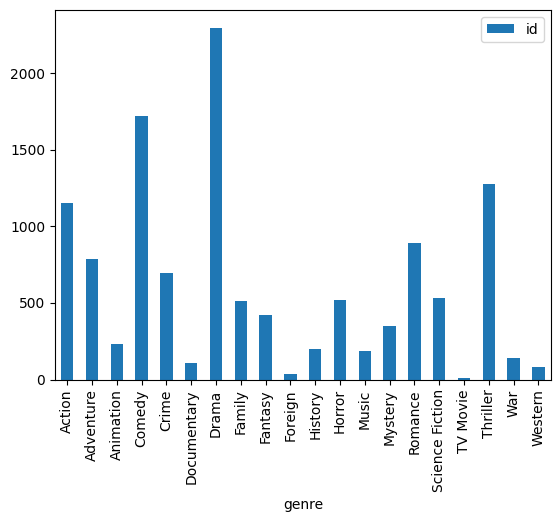

In [ ]:
# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

#**Using outer join to select actors**
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.


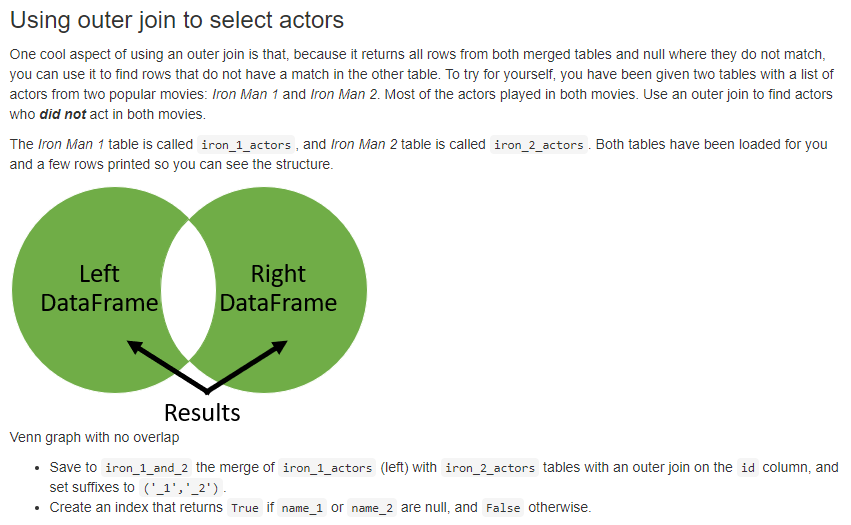

In [ ]:
actors = pd.read_csv('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/actors_movies.csv')

actors.head()

,Actor,Title
0,"[Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...",The Matrix
1,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Reloaded
2,"[Hugo Weaving,Laurence Fishburne,Carrie-Anne M...",The Matrix Revolutions
3,"[Al Pacino,Charlize Theron,Keanu Reeves]",The Devil's Advocate
4,"[James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...",A Few Good Men


In [ ]:
casts = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/casts.p')

casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [ ]:
movie_id_title= movies[['id', 'title']]

movie_id_title.head()

,id,title
0,257,Oliver Twist
1,14290,Better Luck Tomorrow
2,38365,Grown Ups
3,9672,Infamous
4,12819,Alpha and Omega


In [ ]:
movie_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [ ]:
movies_genres_id = movie_to_genres.merge(movie_id_title, how='right',left_on='movie_id',right_on='id')

movies_genres_id.head()

,movie_id,genre,id,title
0,257.0,Crime,257,Oliver Twist
1,257.0,Drama,257,Oliver Twist
2,257.0,Family,257,Oliver Twist
3,14290.0,Crime,14290,Better Luck Tomorrow
4,14290.0,Drama,14290,Better Luck Tomorrow


In [ ]:
casts_name = casts[['movie_id','cast_id','name']]

casts_name.head()

,movie_id,cast_id,name
7,5,22,Sammi Davis
8,5,23,Amanda de Cadenet
9,5,24,Valeria Golino
3,5,25,Madonna
12,5,26,Ione Skye


In [ ]:
movie_casts= casts_name.merge(movies_genres_id, on='movie_id', how='inner')

movies_genres_id.head().sort_values('movie_id')

,movie_id,genre,id,title
0,257.0,Crime,257,Oliver Twist
1,257.0,Drama,257,Oliver Twist
2,257.0,Family,257,Oliver Twist
3,14290.0,Crime,14290,Better Luck Tomorrow
4,14290.0,Drama,14290,Better Luck Tomorrow


In [ ]:
#iron_1_actors = pd.read_csv('iron_1_actors.csv')
iron_1_actors= actors[actors['Title'].str.contains('iron')]

iron_1_actors.head()

In [ ]:
iron_2_actors = pd.read_csv('iron_2_actors.csv')
iron_1_actors.head()

In [ ]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how='outer',
                                     on='id',
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) |
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

#**Self join**
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

1. To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.
2. Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.
3. Use the .head() method to print the first few rows of direct_crews.

In [ ]:
crews = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [ ]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [ ]:
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
display(direct_crews.head())
#print(direct_crews.head())


,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


#**Index merge for movie ratings**
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

1. Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.

In [ ]:
ratings = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/ratings.p')

ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [ ]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
display(movies_ratings.head())
#print(movies_ratings.head())

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


#**Do sequels earn more?**
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

1. With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.

2. Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.

3. Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.

4. Sort by titles_diff by diff in descending order and print the first few rows.

**astype()** function is used to cast a column data type (**dtype**) in **pandas** **object**, it **supports** **String, flat, date, int, datetime** any many other dtypes supported by Numpy. This comes in handy when you wanted to cast the DataFrame column from one data type to another. It is used to cast datatype (dtype).


***DataFrame.astype(dtype, copy=None, errors='raise')***
1. Cast a pandas object to a specified dtype dtype.

In [ ]:
sequels = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/sequels.p').astype(object)
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [ ]:
financials = pd.read_pickle('/content/drive/MyDrive/Data-Science/Data Camp/06 Joining Data with pandas/data/financials.p')
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [ ]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

sequels_fin.head()

,id,title,sequel,budget,revenue
0,19995,Avatar,<NA>,237000000.0,2.787965e+09
1,862,Toy Story,863,30000000.0,3.735540e+08
2,863,Toy Story 2,10193,90000000.0,4.973669e+08
3,597,Titanic,<NA>,200000000.0,1.845034e+09
4,24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [ ]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
                             right_on='id', right_index=True,
                             suffixes=('_org','_seq'))

orig_seq.head()

<ipython-input-74-5e34a57743db>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',


,sequel,id_org,title_org,sequel_org,budget_org,revenue_org,id_seq,title_seq,sequel_seq,budget_seq,revenue_seq
1,863,862,Toy Story,863,30000000.0,373554033.0,41439,Saw: The Final Chapter,<NA>,20000000.0,136150434.0
30,767,675,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,256591,Focus,<NA>,50100000.0,153962963.0
32,122,121,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,49013,Cars 2,<NA>,200000000.0,559852396.0
44,121,120,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,585,"Monsters, Inc.",62211,115000000.0,562816256.0
55,674,673,Harry Potter and the Prisoner of Azkaban,674,130000000.0,789804554.0,395,AVP: Alien vs. Predator,<NA>,70000000.0,171183863.0


In [ ]:
# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff

display(titles_diff.sort_values('diff', ascending=False).head())

#print(titles_diff.sort_values('diff', ascending=False).head())

,title_org,title_seq,diff
2929,Before Sunrise,The Amazing Spider-Man 2,700182027.0
1256,Star Trek III: The Search for Spock,The Matrix,376517383.0
293,Indiana Jones and the Temple of Doom,Man of Steel,329845518.0
1084,Saw,Superman Returns,287169523.0
1334,The Terminator,Star Trek Beyond,265100616.0
